In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from dask.distributed import Client

client = Client(processes=True)
client

Client Scheduler: tcp://127.0.0.1:53524 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [3]:
epoch_key = 'bon', 3, 2

In [4]:
from src.load_data import load_data
import logging

logging.basicConfig(level='INFO', format='%(asctime)s %(message)s',
                    datefmt='%d-%b-%y %H:%M:%S')

animal, day, epoch = epoch_key
data_type, dim = 'clusterless', '1D'

logging.info('Loading data...')
data = load_data(epoch_key)

16-Dec-20 15:13:48 Loading data...
16-Dec-20 15:13:48 Loading position info...
16-Dec-20 15:19:49 Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
16-Dec-20 15:19:49 No DIO file found, using distance from well to segment trials
16-Dec-20 15:19:49 Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
16-Dec-20 15:19:49 No DIO file found, inferring correct inbound/outbound from task rules
16-Dec-20 15:20:25 Loading spikes...
16-Dec-20 15:20:49 Loading multiunit...
16-Dec-20 15:20:53 Finding ripple times...
16-Dec-20 15:48:14 Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
16-Dec-20 15:48:14 No DIO file found, using distance from well to segment trials
16-Dec-20 15:48:19 Failed to load file: /Users/edeno/Documents/GitHub/replay_trajectory_paper/src/../Raw-Data/Bond/bonDIO03.mat
16-Dec-20 15:48:19 No DIO file found, 

In [5]:
client.close()

In [6]:
data['multiunit'].features

<xarray.DataArray 'features' (features: 8)>
array(['channel_1_max', 'channel_2_max', 'channel_3_max', 'channel_4_max',
       'max_width', 'max_height_change', 'x_position', 'y_position'],
      dtype='<U17')
Coordinates:
  * features  (features) <U17 'channel_1_max' 'channel_2_max' ... 'y_position'

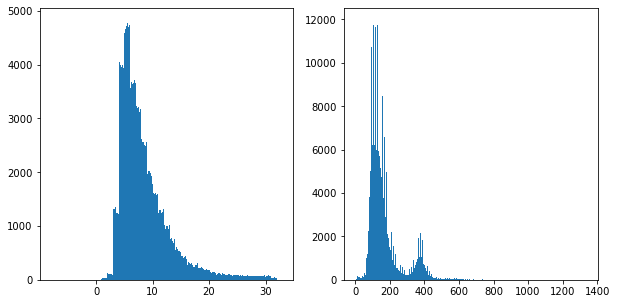

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data['multiunit'].sel(features='max_width').values.flat, bins=1000);
axes[1].hist(data['multiunit'].sel(features='max_height_change').values.flat, bins=1000);

In [8]:
import numpy as np


INTERNEURON_SPIKE_WIDTH_MAX = 0.4 # ms

(data['multiunit'].sel(features='max_width') < INTERNEURON_SPIKE_WIDTH_MAX).sum(axis=0)

<xarray.DataArray (tetrodes: 23)>
array([ 0,  0,  0,  2, 12,  0,  0,  1, 55,  1,  0, 21,  3,  2,  2,  0,  0,
        5,  0,  1,  0,  0,  5])
Coordinates:
    features  <U17 'max_width'
Dimensions without coordinates: tetrodes

In [9]:
is_interneuron_spike = (data['multiunit'].sel(features='max_width') < INTERNEURON_SPIKE_WIDTH_MAX)

data['multiunit'].where(~is_interneuron_spike).isel(tetrodes=0).dropna('time')

<xarray.DataArray (time: 14553, features: 8)>
array([[ 6.33975991e+01,  4.45755579e+01,  4.30808101e+01, ...,
         1.44000000e+02,  8.42679037e+01,  1.43209143e+02],
       [ 4.66126886e+01,  5.34743505e+01,  8.25522115e+01, ...,
         1.74000000e+02,  8.51172423e+01,  1.44702790e+02],
       [ 6.24338988e+01,  6.90753904e+01,  8.90145038e+01, ...,
         1.43000000e+02,  8.37533495e+01,  1.44531056e+02],
       ...,
       [ 7.82997358e+01,  7.55232312e+01,  5.61663260e+01, ...,
         1.12000000e+02,  1.19745641e+02,  9.00326700e+01],
       [ 7.62700622e+01,  7.76723058e+01,  5.35375340e+01, ...,
         1.42000000e+02,  7.27440292e-02, -8.99099961e-01],
       [ 5.36529793e+01,  7.63912336e+01,  4.68765892e+01, ...,
         1.12000000e+02,  1.21439960e+02,  8.77717875e+01]])
Coordinates:
  * time      (time) timedelta64[ns] 01:02:09.151700 ... 01:17:39.957700
  * features  (features) <U17 'channel_1_max' 'channel_2_max' ... 'y_position'

In [10]:
data['multiunit'].where(~is_interneuron_spike).isel(tetrodes=4).dropna('time')

<xarray.DataArray (time: 73284, features: 8)>
array([[ 51.21124171,  20.94456518,  30.3157404 , ..., 120.        ,
         82.14252924, 145.55599847],
       [ 42.4988935 ,  21.11823013,  34.24572328, ..., 104.        ,
         82.10155236, 146.44557224],
       [ 24.42850098,  23.50548693,  35.31151743, ..., 116.        ,
         85.00478754, 143.97739696],
       ...,
       [ 34.90305436,  31.35454154,  30.14309645, ...,  83.        ,
        122.11411688,  87.77714625],
       [ 70.77281774,  23.45651514,  14.03202278, ..., 119.        ,
        121.31366054,  87.56796205],
       [ 61.24480558,  16.17772886,  44.19000925, ..., 120.        ,
        121.90359107,  86.02500284]])
Coordinates:
  * time      (time) timedelta64[ns] 01:02:09.037700 ... 01:17:40.009700
  * features  (features) <U17 'channel_1_max' 'channel_2_max' ... 'y_position'

In [11]:
data['multiunit'].isel(tetrodes=4).dropna('time')

<xarray.DataArray (time: 73296, features: 8)>
array([[ 51.21124171,  20.94456518,  30.3157404 , ..., 120.        ,
         82.14252924, 145.55599847],
       [ 42.4988935 ,  21.11823013,  34.24572328, ..., 104.        ,
         82.10155236, 146.44557224],
       [ 24.42850098,  23.50548693,  35.31151743, ..., 116.        ,
         85.00478754, 143.97739696],
       ...,
       [ 34.90305436,  31.35454154,  30.14309645, ...,  83.        ,
        122.11411688,  87.77714625],
       [ 70.77281774,  23.45651514,  14.03202278, ..., 119.        ,
        121.31366054,  87.56796205],
       [ 61.24480558,  16.17772886,  44.19000925, ..., 120.        ,
        121.90359107,  86.02500284]])
Coordinates:
  * time      (time) timedelta64[ns] 01:02:09.037700 ... 01:17:40.009700
  * features  (features) <U17 'channel_1_max' 'channel_2_max' ... 'y_position'

In [112]:
data['multiunit'].where(~is_interneuron_spike)

<xarray.DataArray (time: 465497, features: 8, tetrodes: 23)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,  40.6165247 ],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  73.54054118],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  65.31678431],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,  50.        ],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  83.59773431],
        [         nan,          nan,          nan, ...,          nan,
                  nan, 147.23259643]],

       ...,

       [[         nan,          nan,          nan, ...,          nan,
                  nan,  35.00071287],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  53.80508369],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  39.91376494],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,  80.        ],
        [         nan,          nan,          nan, ...,          nan,
                  nan, 121.19662876],
        [         nan,          nan,          nan, ...,          nan,
                  nan,  86.94940986]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,   

In [12]:
from loren_frank_data_processing.position import (EDGE_ORDER, EDGE_SPACING,
                                                  make_track_graph)
from src.parameters import ANIMALS, PROCESSED_DATA_DIR

is_training = data['position_info'].speed > 4
position = data['position_info'].loc[:, 'linear_position']
track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)

In [13]:
import os
import xarray as xr
from replay_trajectory_classification import ClusterlessClassifier
from loren_frank_data_processing import reshape_to_segments


model_name = os.path.join(
    PROCESSED_DATA_DIR,
    f'{animal}_{day:02}_{epoch:02}_{data_type}_{dim}_model.pkl')

results = xr.open_dataset(
    os.path.join(
        PROCESSED_DATA_DIR, f'{animal}_{day:02}_{epoch:02}.nc'),
    group=f'/{data_type}/{dim}/classifier/ripples/')
logging.info('Found existing results. Loading...')
ripple_times = data['ripple_times'].loc[:, ['start_time', 'end_time']]
spikes = (((data['multiunit'].sum('features') > 0) * 1.0)
          .to_dataframe(name='spikes').unstack())
spikes.columns = data['tetrode_info'].tetrode_id
ripple_spikes = reshape_to_segments(spikes, ripple_times)
classifier = ClusterlessClassifier.load_model(model_name)

16-Dec-20 15:50:29 Found existing results. Loading...


In [60]:
from src.analysis import get_replay_info
from src.parameters import SAMPLING_FREQUENCY, PROBABILITY_THRESHOLD

replay_info, replay_linear_position_hover = get_replay_info(
    results,
    ripple_spikes,
    data["ripple_times"],
    data["position_info"],
    track_graph,
    SAMPLING_FREQUENCY,
    PROBABILITY_THRESHOLD,
    epoch_key,
    classifier,
    data["ripple_consensus_trace_zscore"],
)

In [61]:
replay_info

,start_time,end_time,duration,Continuous_duration,Fragmented_duration,Fragmented-Continuous-Mix_duration,Hover_duration,Hover-Continuous-Mix_duration,Continuous,Fragmented,...,animal,day,epoch,center_well_position,choice_position,left_arm_start,left_well_position,right_arm_start,right_well_position,max_linear_distance
ripple_number,,,,,,,,,,,,,,,,,,,,,
1,01:02:20.175033,01:02:20.281700,0.106667,0.000,0.0,0.000,0.108,0.000,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
2,01:02:22.785700,01:02:22.904366,0.118667,0.000,0.0,0.000,0.120,0.000,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
3,01:02:27.075700,01:02:27.181700,0.106000,0.000,0.0,0.000,0.000,0.082,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
4,01:02:29.244366,01:02:29.301033,0.056667,0.000,0.0,0.000,0.056,0.000,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
5,01:02:34.055033,01:02:34.112366,0.057333,0.000,0.0,0.000,0.058,0.000,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,01:17:29.603033,01:17:29.685700,0.082667,0.000,0.0,0.000,0.000,0.054,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
248,01:17:31.262366,01:17:31.344366,0.082000,0.000,0.0,0.000,0.000,0.082,False,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915
249,01:17:32.299033,01:17:32.435033,0.136000,0.052,0.0,0.004,0.000,0.062,True,False,...,bon,3,2,0.0,74.036522,207.255752,319.416145,89.036522,192.255752,186.196915


In [62]:
replay_info.columns.tolist()

['start_time',
 'end_time',
 'duration',
 'Continuous_duration',
 'Fragmented_duration',
 'Fragmented-Continuous-Mix_duration',
 'Hover_duration',
 'Hover-Continuous-Mix_duration',
 'Continuous',
 'Fragmented',
 'Fragmented-Continuous-Mix',
 'Hover',
 'Hover-Continuous-Mix',
 'is_classified',
 'n_unique_spiking',
 'n_total_spikes',
 'population_rate',
 'actual_x_position',
 'actual_y_position',
 'actual_linear_distance',
 'actual_linear_position',
 'actual_speed',
 'actual_velocity_center_well',
 'replay_distance_from_actual_position',
 'replay_speed',
 'replay_velocity_actual_position',
 'replay_velocity_center_well',
 'replay_distance_from_center_well',
 'replay_linear_position',
 'replay_total_distance',
 'replay_total_displacement',
 'state_order',
 'spatial_coverage',
 'spatial_coverage_percentage',
 'mean_ripple_consensus_trace_zscore',
 'max_ripple_consensus_trace_zscore',
 'Continuous_max_probability',
 'Continuous_duration',
 'Continuous_fraction_of_time',
 'Fragmented_max_pro

In [73]:
ripple = next(data['ripple_times'].itertuples())
ripple

Pandas(Index=1, start_time=Timedelta('0 days 01:02:20.175033'), end_time=Timedelta('0 days 01:02:20.281700'), duration=0.106666667)

In [87]:
def get_probability(posterior):
    '''Get probability of each state and two states derived from mixtures of
    each state.

    Parameters
    ----------
    results : xarray.Dataset

    Returns
    -------
    probability : xarray.DataArray

    '''
    try:
        probability = (posterior
                       .sum(['x_position', 'y_position'], skipna=True))
    except ValueError:
        probability = (posterior
                       .dropna('position', how='all')
                       .sum('position', skipna=False))

    return xr.concat(
        (probability,
         probability
            .sel(state=['Hover', 'Continuous'])
            .sum('state', skipna=False)
            .assign_coords(state='Hover-Continuous-Mix'),
         probability
            .sel(state=['Fragmented', 'Continuous'])
            .sum('state', skipna=False)
            .assign_coords(state='Fragmented-Continuous-Mix'),
         ), dim='state')

In [93]:
from src.analysis import get_is_classified

probability_threshold = 0.8

posterior = (results
             .sel(ripple_number=ripple.Index)
             .acausal_posterior
             .dropna('time', how='all')
             .assign_coords(
                 time=lambda ds: ds.time / np.timedelta64(1, 's')))

ripple_position_info = data['position_info'].loc[ripple.start_time:ripple.end_time]
ripple_spikes = spikes.loc[ripple.start_time:ripple.end_time]

probability = get_probability(posterior)
is_classified = get_is_classified(probability, probability_threshold)
is_unclassified = (is_classified.sum('state') < 1).assign_coords(
    state='Unclassified')
is_classified = xr.concat((is_classified, is_unclassified), dim='state')



In [111]:
(is_classified.sum('time') > 0).to_dataframe().drop(columns=['ripple_number']).T.reset_index(drop=True)

state,Continuous,Fragmented,Hover,Hover-Continuous-Mix,Fragmented-Continuous-Mix,Unclassified
0,False,False,True,False,False,False


In [107]:
import pandas as pd

blah = pd.DataFrame()
blah.reset_index?

Signature:
blah.reset_index(
    level=None,
    drop=False,
    inplace=False,
    col_level=0,
    col_fill='',
)
Docstring:
Reset the index, or a level of it.

Reset the index of the DataFrame, and use the default one instead.
If the DataFrame has a MultiIndex, this method can remove one or more
levels.

Parameters
----------
level : int, str, tuple, or list, default None
    Only remove the given levels from the index. Removes all levels by
    default.
drop : bool, default False
    Do not try to insert index into dataframe columns. This resets
    the index to the default integer index.
inplace : bool, default False
    Modify the DataFrame in place (do not create a new object).
col_level : int or str, default 0
    If the columns have multiple levels, determines which level the
    labels are inserted into. By default it is inserted into the first
    level.
col_fill : object, default ''
    If the columns have multiple levels, determines how the other
    levels are named. If N

In [ ]:
(is_classified.sum('time') > 0).to_dataframe().drop(columns=['ripple_number']).T.reset_index

In [89]:
from src.analysis import (maximum_a_posteriori_estimate, calculate_replay_distance,
                          highest_posterior_density, gaussian_smooth, n_tetrodes_active, n_total_spikes,
                          population_rate, get_state_order, fraction_spikes_less_than_6_ms, duration,
                          fraction_of_time, median_spikes_per_bin)

probability_threshold = 0.8
sampling_frequency = 500
position_info = data['position_info']
ripple_number = ripple.Index
# ripple_spikes = ripple_spikes.loc[ripple_number]

posterior = (results
             .sel(ripple_number=ripple_number)
             .acausal_posterior
             .dropna('time', how='all')
             .assign_coords(
                 time=lambda ds: ds.time / np.timedelta64(1, 's')))
probability = get_probability(posterior)
is_classified = get_is_classified(probability, probability_threshold)
is_unclassified = (is_classified.sum('state') < 1).assign_coords(
    state='Unclassified')
is_classified = xr.concat((is_classified, is_unclassified), dim='state')

ripple_position_info = position_info.loc[slice(ripple.start_time, ripple.end_time)]
actual_track_segment_ids = (np.asarray(ripple_position_info['track_segment_id'])
                            .squeeze().astype(int))
actual_positions = np.asarray(ripple_position_info[['x_position', 'y_position']])
map_estimate = maximum_a_posteriori_estimate(posterior.sum('state'))
(replay_distance_from_actual_position,
 replay_distance_from_center_well) = calculate_replay_distance(
    track_graph, map_estimate, actual_positions,
    actual_track_segment_ids, position_info)

try:
    replay_total_displacement = np.abs(
        replay_distance_from_center_well[-1] -
        replay_distance_from_center_well[0])
except IndexError:
    replay_total_displacement = np.nan
    
time = np.asarray(posterior.time)
map_estimate = map_estimate.squeeze()
replay_speed = np.abs(np.gradient(
    replay_distance_from_center_well, time))
SMOOTH_SIGMA = 0.0025
replay_speed = gaussian_smooth(
    replay_speed, SMOOTH_SIGMA, sampling_frequency)
replay_velocity_actual_position = np.gradient(
    replay_distance_from_actual_position, time)
replay_velocity_center_well = np.gradient(
    replay_distance_from_center_well, time)

hpd_threshold = highest_posterior_density(
    posterior.sum("state"), coverage=0.95)
isin_hpd = posterior.sum("state") >= hpd_threshold[:, np.newaxis]
spatial_coverage = (
    isin_hpd * np.diff(posterior.position)[0]).sum("position").values
n_position_bins = (posterior.sum("state", skipna=True)
                   > 0).sum("position").values[0]
spatial_coverage_percentage = (isin_hpd.sum("position") /
                               n_position_bins).values
distance_change = np.abs(np.diff(replay_distance_from_center_well))
distance_change = np.insert(distance_change, 0, 0)

# Whole ripple statistics
metrics = {
    'is_classified': is_classified.sel(state='Unclassified').values.sum() < len(is_classified),
    'n_unique_spiking': n_tetrodes_active(ripple_spikes),
    'n_total_spikes': n_total_spikes(ripple_spikes),
    'duration': duration(np.ones_like(time), sampling_frequency),
    'population_rate': population_rate(ripple_spikes, sampling_frequency),
    'replay_distance_from_actual_position': np.mean(
        replay_distance_from_actual_position),
    'replay_speed': np.mean(replay_speed),
    'replay_velocity_actual_position': np.mean(
        replay_velocity_actual_position),
    'replay_velocity_center_well': np.mean(replay_velocity_center_well),
    'replay_distance_from_center_well': np.mean(
        replay_distance_from_center_well),
    'replay_linear_position': np.mean(map_estimate),
    'replay_total_distance': np.sum(distance_change),
    'replay_total_displacement': replay_total_displacement,
    'state_order': get_state_order(is_classified),
    'spatial_coverage': np.mean(spatial_coverage),
    'spatial_coverage_percentage': np.mean(spatial_coverage_percentage),
}

for state, above_threshold in is_classified.groupby('state'):
    above_threshold = above_threshold.astype(bool).values.squeeze()
    try:
        metrics[f'{state}_max_probability'] = np.max(
            np.asarray(probability.sel(state=state)))
    except (KeyError, ValueError):
        metrics[f'{state}_max_probability'] = np.nan
    if np.any(above_threshold):
        metrics[f'{state}_replay_distance_from_actual_position'] = np.mean(
            replay_distance_from_actual_position[above_threshold])  # cm
        metrics[f'{state}_replay_speed'] = np.mean(
            replay_speed[above_threshold])  # cm / s
        metrics[f'{state}_replay_velocity_actual_position'] = np.mean(
            replay_velocity_actual_position[above_threshold])  # cm / s
        metrics[f'{state}_replay_velocity_center_well'] = np.mean(
            replay_velocity_center_well[above_threshold])  # cm / s
        metrics[f'{state}_replay_distance_from_center_well'] = np.mean(
            replay_distance_from_center_well[above_threshold])  # cm
        metrics[f'{state}_replay_linear_position'] = np.mean(
            map_estimate[above_threshold])  # cm
        metrics[f'{state}_replay_total_distance'] = np.sum(
            distance_change[above_threshold])  # cm
        metrics[f'{state}_min_time'] = np.min(time[above_threshold])  # s
        metrics[f'{state}_max_time'] = np.max(time[above_threshold])  # s
        metrics[f'{state}_n_unique_spiking'] = n_tetrodes_active(
            ripple_spikes.iloc[above_threshold])
        metrics[f'{state}_n_total_spikes'] = n_total_spikes(
            ripple_spikes.iloc[above_threshold])
        metrics[f'{state}_median_fraction_spikes_under_6_ms'] = np.nanmedian(
            fraction_spikes_less_than_6_ms(
                ripple_spikes.iloc[above_threshold], sampling_frequency)
        )
        metrics[f'{state}_duration'] = duration(
            above_threshold, sampling_frequency)
        metrics[f'{state}_fraction_of_time'] = fraction_of_time(
            above_threshold, time)
        metrics[f'{state}_population_rate'] = population_rate(
            ripple_spikes.iloc[above_threshold], sampling_frequency)
        metrics[f'{state}_median_spikes_per_bin'] = median_spikes_per_bin(
            ripple_spikes.loc[above_threshold])
        metrics[f'{state}_spatial_coverage'] = np.median(
            spatial_coverage[above_threshold])  # cm
        metrics[f'{state}_spatial_coverage_percentage'] = np.median(
            spatial_coverage_percentage[above_threshold])
        metrics[f"{state}_Hov_avg_prob"] = float(
            probability.sel(state="Hover").isel(
                time=above_threshold).mean()
        )
        metrics[f"{state}_Cont_avg_prob"] = float(
            probability.sel(state="Continuous").isel(
                time=above_threshold).mean()
        )
        metrics[f"{state}_Frag_avg_prob"] = float(
            probability.sel(state="Fragmented").isel(
                time=above_threshold).mean()
        )

# Animal position info
metrics['actual_x_position'] = np.mean(actual_positions[:, 0])
metrics['actual_y_position'] = np.mean(actual_positions[:, 1])
metrics['actual_linear_distance'] = np.mean(ripple_position_info['linear_distance'])
metrics['actual_linear_position'] = np.mean(ripple_position_info['linear_position'])
metrics['actual_speed'] = np.mean(ripple_position_info['speed'])


metrics

{'is_classified': True,
 'n_unique_spiking': 19,
 'n_total_spikes': 136,
 'duration': 108.0,
 'population_rate': 54.750402576489535,
 'replay_distance_from_actual_position': 0.9705004774924333,
 'replay_speed': 2.210577400142534e-14,
 'replay_velocity_actual_position': 3.553852723919007,
 'replay_velocity_center_well': -1.052655904829778e-15,
 'replay_distance_from_center_well': 1.480856351189223,
 'replay_linear_position': 1.4807304383209297,
 'replay_total_distance': 0.0,
 'replay_total_displacement': 0.0,
 'state_order': ['Hover'],
 'spatial_coverage': 2.9614608766418593,
 'spatial_coverage_percentage': 0.010101010101010098,
 'Continuous_max_probability': 0.02283411143309067,
 'Fragmented_max_probability': 0.00011444371251897727,
 'Fragmented-Continuous-Mix_max_probability': 0.022884265849976815,
 'Hover_max_probability': 0.9840180456768868,
 'Hover_replay_distance_from_actual_position': 0.9705004774924333,
 'Hover_replay_speed': 2.210577400142534e-14,
 'Hover_replay_velocity_actual

In [92]:
data['ripple_consensus_trace_zscore'].loc[slice(ripple.start_time, ripple.end_time)]

,ripple_consensus_trace_zscore
time,
01:02:20.175033,0.143327
01:02:20.175700,0.185989
01:02:20.176366,0.234200
01:02:20.177033,0.287512
01:02:20.177700,0.344999
...,...
01:02:20.279033,0.180611
01:02:20.279700,0.131207
01:02:20.280366,0.076326


In [94]:
time.shape

(54,)

In [95]:
time

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106])

In [96]:
above_threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [131]:
import pandas as pd


ripple_consensus_trace_zscore = data['ripple_consensus_trace_zscore']
time = data['position_info'].index

new_index = pd.Index(np.unique(np.concatenate(
    (ripple_consensus_trace_zscore.index, time))), name='time')
ripple_consensus_trace_zscore = (ripple_consensus_trace_zscore
               .reindex(index=new_index)
               .interpolate(method='linear')
               .reindex(index=time)
               )
ripple_consensus_trace_zscore = reshape_to_segments(ripple_consensus_trace_zscore, ripple_times)
ripple_consensus_trace_zscore 

ripple_consensus_trace_zscore
ripple_number time                                          
1             00:00:00.000666                       0.185989
              00:00:00.002666                       0.344999
              00:00:00.004666                       0.527645
              00:00:00.006666                       0.688113
              00:00:00.008666                       0.788921
...                                                      ...
251           00:00:00.173333                       1.273501
              00:00:00.175333                       1.057545
              00:00:00.177333                       0.757454
              00:00:00.179333                       0.408636
              00:00:00.181333                       0.075547

[11273 rows x 1 columns]

In [102]:
ripple_consensus_trace_zscore.shape

(465497, 1)

In [126]:
classified_states = (is_classified.sum('time') > 0).to_dataframe()['is_classified'].to_dict()

In [127]:
{**metrics, **classified_states}

{'is_classified': True,
 'n_unique_spiking': 19,
 'n_total_spikes': 136,
 'duration': 108.0,
 'population_rate': 54.750402576489535,
 'replay_distance_from_actual_position': 0.9705004774924333,
 'replay_speed': 2.210577400142534e-14,
 'replay_velocity_actual_position': 3.553852723919007,
 'replay_velocity_center_well': -1.052655904829778e-15,
 'replay_distance_from_center_well': 1.480856351189223,
 'replay_linear_position': 1.4807304383209297,
 'replay_total_distance': 0.0,
 'replay_total_displacement': 0.0,
 'state_order': ['Hover'],
 'spatial_coverage': 2.9614608766418593,
 'spatial_coverage_percentage': 0.010101010101010098,
 'Continuous_max_probability': 0.02283411143309067,
 'Fragmented_max_probability': 0.00011444371251897727,
 'Fragmented-Continuous-Mix_max_probability': 0.022884265849976815,
 'Hover_max_probability': 0.9840180456768868,
 'Hover_replay_distance_from_actual_position': 0.9705004774924333,
 'Hover_replay_speed': 2.210577400142534e-14,
 'Hover_replay_velocity_actual